#                            **KNN (K- Nearest Nighbour)**


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.shape

(150, 4)

In [12]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

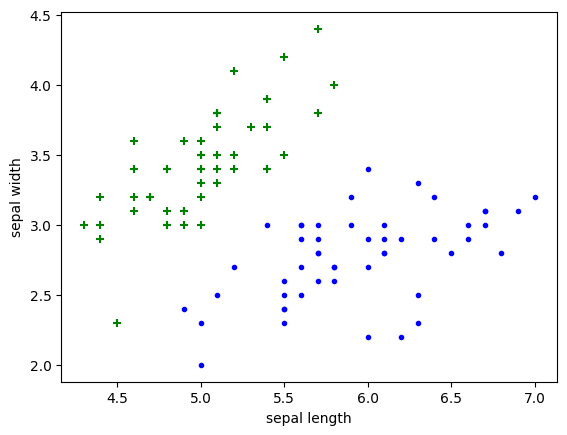

In [21]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker='.')

In [23]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis = 'columns')
y = df.target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [27]:
len(x_train)

120

Create KNN (K Neighbour Classification)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
knn.score(x_test, y_test)

0.9666666666666667

In [37]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

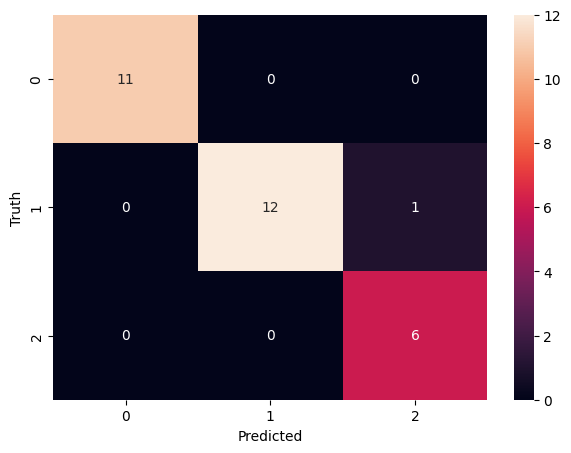

In [40]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

